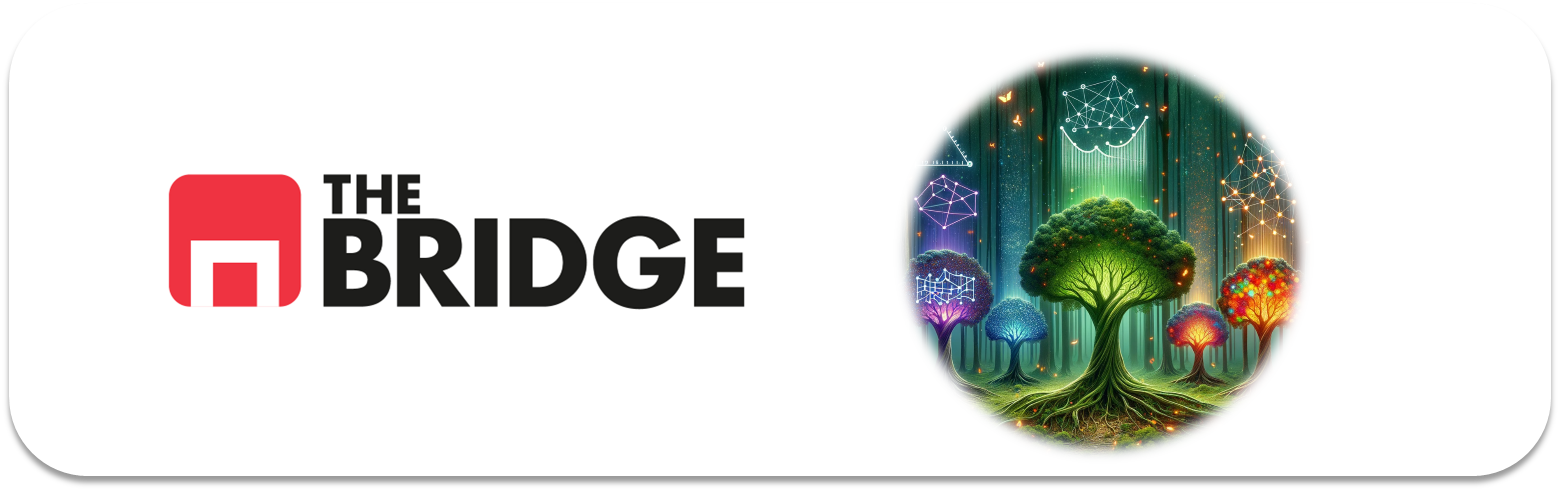

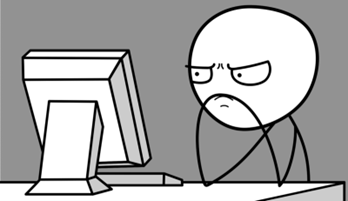

Para ejercitarte y afianzar lo aprendido sobre **Clasificacion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### Ejercicio 1

Genera un conjunto de datos de lunas usando 

```python
make_moons(n_samples=10000, noise=0.4)
```

La función make_moons se encuentra en el módulo `datasets` de `sklearn`. Juega con ella para ver qué tipo de datos genera, y  crea un X_moons y un y_moons. Visualiza las moons con un scatter plot de las dos features de X_moons. (ojo X_moons es un array de numpy de dos dimesiones para acceder a la primera X_moons[:,0] y para la segunda...)

In [3]:
from sklearn.datasets import make_moons

In [4]:
make_moons

<function sklearn.datasets._samples_generator.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)>

In [8]:


X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [9]:
X_moons.shape

(10000, 2)

<Axes: >

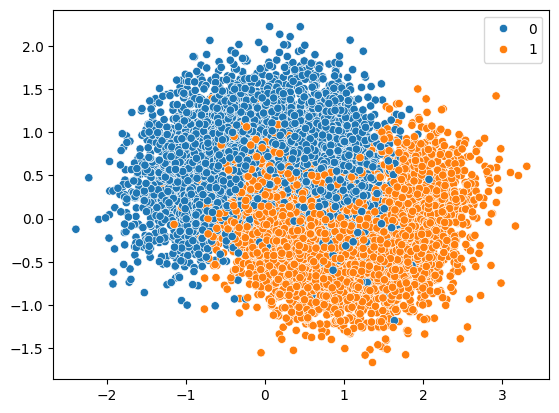

In [4]:
sns.scatterplot(x = X_moons[:,0], y = X_moons[:,1], hue = y_moons)

### Ejercicio 2

El objetivo de los modelos que vamos a ir construyendo es aprender a clasificar correctamente en cada "luna" (moon) a un punto dadas sus coordenadas. Para ello crea un par de juegos X,y para train y test al 20% de test a partir de los puntos generados en el ejercicio anterior.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    test_size=0.2,
                                                    random_state=42)

### Ejercicio 3

Instancia un árbol de decisión de `sklearn` sin añadir hiperparámetros.

In [11]:
from sklearn.tree import DecisionTreeClassifier


tree_moon_clf = DecisionTreeClassifier()

### Ejercicio 4

Entrena el árbol y evalúalo contra test, usa para ello el classification_report de `sklearn`

In [12]:
from sklearn.metrics import classification_report

tree_moon_clf.fit(X_train, y_train)
y_pred = tree_moon_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1013
           1       0.81      0.82      0.81       987

    accuracy                           0.81      2000
   macro avg       0.81      0.82      0.81      2000
weighted avg       0.82      0.81      0.82      2000



### Ejercicio 5

Instancia un nuevo árbol con los hiperparámetros (argumentos del constructor), `max_depth` a 5 y `max_leaf_nodes` a 15. Busca en la documentación de `sklearn` el significado de ambos hiperparámetros.

In [13]:
tree_moon_clf_2 = DecisionTreeClassifier(max_depth= 5, max_leaf_nodes= 15)

### Ejercicio 6

Entrénalo, evaluálo contra test y muestra el resultado a través del classification_report.

In [14]:
tree_moon_clf_2.fit(X_train, y_train)
y_pred = tree_moon_clf_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1013
           1       0.84      0.89      0.86       987

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



Comenta el resultado

*La mejor es sensible, debido a que el ajuste de hiperparámetros ha sido bastante bueno. En general los modelos basados en árboles necesitan un ajuste más fino que las regresiones (lineal, que apenas hay que hacer nada, y logística)*

### Ejercicio 7

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase `ShuffleSplit` de `sklearn` para ayudarte con esto

In [15]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000 # Número de subsets
n_instances = 100 # Número de instancias por subconjunto

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, # El valor de test_size es el que fuerza el del train al numero de instancias
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [16]:
mini_sets

[(array([[-3.15325488e-01,  4.94322659e-01],
         [ 1.07395888e+00, -3.83006874e-01],
         [ 1.23368080e+00, -2.02727544e-01],
         [ 1.45327595e+00, -4.97650493e-01],
         [ 6.29403125e-01, -4.58057181e-01],
         [ 1.31621613e+00, -4.96340629e-01],
         [ 6.61605020e-01, -5.25120656e-01],
         [ 1.17772151e+00,  2.12896730e-01],
         [ 1.27074026e+00,  8.37618484e-01],
         [ 2.40777741e-01, -4.05280317e-01],
         [ 2.09601211e+00,  2.29976411e-01],
         [ 3.96488095e-01, -3.07170096e-01],
         [-7.76673348e-01,  1.98996929e-01],
         [-8.88960092e-01,  1.06022488e+00],
         [ 1.21458297e+00, -3.55536724e-01],
         [ 1.72720880e+00,  3.94406303e-01],
         [ 1.96647532e+00,  2.91551342e-01],
         [-2.00602385e-01,  4.62530417e-02],
         [-1.19424550e+00,  1.64842526e-01],
         [-2.98171028e-01,  4.07082497e-01],
         [ 2.07327094e+00,  2.02547469e-02],
         [-7.43875589e-01,  1.01769167e+00],
         [

In [19]:
# Generar un objeto ShuffleSplit
subconjuntos = ShuffleSplit(n_splits=1000, test_size=100, random_state=42)

sub_sets = []

for train_index, test_index in subconjuntos.split(X_train):
    # Obtener el subconjunto de entrenamiento
    X_train_sub = X_train[train_index]

    # Obtener el subconjunto de prueba
    y_train_sub = y_train[train_index]
    sub_sets.append((X_train_sub, y_train_sub))

In [20]:
sub_sets

[(array([[ 1.32766691, -1.51967766],
         [ 0.67263853, -0.69365641],
         [ 1.06394628,  0.49118608],
         ...,
         [-1.05424369, -0.0267956 ],
         [ 1.71526884,  0.06336507],
         [ 2.39371328,  0.04210239]]),
  array([1, 1, 0, ..., 0, 1, 1], dtype=int64)),
 (array([[ 0.11056639,  1.396441  ],
         [ 0.71733123,  0.94451514],
         [ 1.89568381,  0.17923941],
         ...,
         [-0.04014121, -0.76166016],
         [ 0.80493177,  0.94333065],
         [ 1.69124637, -0.27316652]]),
  array([0, 0, 0, ..., 1, 0, 1], dtype=int64)),
 (array([[ 2.11097969,  0.90059332],
         [-0.22298634,  1.13626033],
         [ 1.48968952,  0.2074453 ],
         ...,
         [ 0.14699824,  0.2052638 ],
         [ 0.69867944,  0.04961059],
         [-0.6427907 ,  0.20727619]]),
  array([1, 0, 1, ..., 0, 1, 0], dtype=int64)),
 (array([[-0.62085275,  1.63927316],
         [-0.25921995,  0.85304702],
         [ 1.74253591,  0.17868387],
         ...,
         [ 0.6040

### Ejercicio 8

Entrena un árbol de decisión por cada subconjunto anterior (ve acumulándolos en una lista, llámala "bosque" o "forest"). Emplea como hiperparámetros los del ejercicio 5.

In [21]:

forest = []

for X_train_mini,y_mini_train in mini_sets:
    subtree = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 15)
    subtree.fit(X_train_mini, y_mini_train)
    forest.append(subtree)



In [24]:
len(forest)

1000

In [22]:
bosques=[]

for X_train_sub, y_train_sub in sub_sets:
    sub_tree= DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15 )
    sub_tree.fit(X_train_sub, y_train_sub)
    bosques.append(sub_tree)

In [27]:
len(bosques)


1000

### Ejercicio 9

Evalua cada árbol del bosque contra X_test original en la métrica de `accuracy` y muestra la media de todas las medidas. Emplea para ello `accuracy_score` de `sklearn`. Comenta el resultado.

In [14]:
from sklearn.metrics import accuracy_score

aciertos = []
for tree in forest:
    y_pred = tree.predict(X_test)
    acierto = accuracy_score(y_test, y_pred)
    aciertos.append(acierto)

print("Acierto medio de un árbol:", np.mean(aciertos))

Acierto medio de un árbol: 0.8111195


*Como era un poco de esperar un árbol entrenado con menor cantidad de datos no está a la altura de otro entrenado sobre el mismo dataset pero con mayor cantidad de información (81% vs 86%). Es lo que se denomina weak_learner*

### Ejercicio 10

Vamos a hacer un consejo de árboles... Es decir ahora vuelve a predecir las instancias de X_test para cada árbol pero guarda las predicciones en una lista. Es decir crea una lista con los 1000 conjuntos de predicciones (uno por cada árbol)

In [15]:
predicciones = np.empty([n_trees, len(X_test)], dtype=np.uint8) # con un array
predicciones_list = [] # con una lista

for indice,tree in enumerate(forest):
    y_pred = tree.predict(X_test)
    predicciones_list.append(y_pred.copy())
    predicciones[indice] = y_pred.copy()

### Ejercicio 11

Ahora vamos a construir la predicción final del consejo de árboles mediante un mecanismo de "hard-voting" es decir para cada predicción escoge la clase más votada. Puedes hacerlo recorriendo cada lista de predicciones y contando cual clase tiene más votos y apuntándolo o usando `mode` (la moda) de `scipy`

In [16]:
# Ejemplo de votación para la primera instancia de X_test
Y_pred_consejo = []
votos_0 = 0
votos_1 = 0
for i in range(n_trees):
    if predicciones_list[i][0] == 0:
        votos_0 += 1
    else:
        votos_1 += 1

if votos_0 > votos_1:
    Y_pred_consejo.append(0)
else:
    Y_pred_consejo.append(1)

In [17]:
### Con la moda
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(predicciones, axis=0)

In [18]:
# A mano
Y_pred_consejo = []
for i in range(len(X_test)):
    votos_0 = 0
    votos_1 = 0
    for j in range(n_trees):
        if predicciones_list[j][i] == 0:
            votos_0 += 1
        else:
            votos_1 += 1

    if votos_0 > votos_1:
        Y_pred_consejo.append(0)
    else:
        Y_pred_consejo.append(1)


### Ejercicio 12

Evalua las predicciones del consejo contra y_test y comenta el resultado. Utiliza `accuracy_score`

In [19]:
# Version manual
print("Accuracy del árbol:", accuracy_score(y_test, Y_pred_consejo))

Accuracy del árbol: 0.8725


In [20]:
# Version mode:
print("Accuracy del árbol:", accuracy_score(y_test, y_pred_majority_votes.reshape(-1)))

Accuracy del árbol: 0.872


*Son la misma, como era de esperar porque es la misma predicción comunal que mejora 1.4 puntos la predicción de un muy buen modelo. ¿Por qué? Bueno, es algo que explicaremos en el siguiente sprint cuando hablemos de los ensamblados de modelos y entrenes tu segundo Random Forest (el primero acabas de hacerlo, enhorabuena)*